<a href="https://colab.research.google.com/github/bintangnabiil/Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/blob/main/Rangkuman_Chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 4: Training Methods
Chapter 4 mendalami bagaimana algoritma machine learning bekerja secara internal, khususnya fokus pada Linear Regression dan Logistic Regression. Chapter ini tidak hanya mengajarkan cara menggunakan algoritma, tetapi juga memahami matematika di baliknya, bagaimana algoritma belajar dari data, dan bagaimana mengoptimalkan parameter model.

##1. Linear Regression - Fondasi Matematika
###1.1 Konsep Teoritis
Linear Regression adalah salah satu algoritma supervised learning paling fundamental yang bertujuan untuk menemukan hubungan linear antara variabel independen (features) dan variabel dependen (target). Model ini mencoba mencocokkan garis lurus (atau hyperplane dalam dimensi yang lebih tinggi) yang paling baik merepresentasikan hubungan dalam data.

###1.2 Persamaan Matematis:
- Untuk kasus sederhana dengan satu feature:
$$ŷ = θ₀ + θ₁x₁$$

- Untuk multiple features:
$$ŷ = θ₀ + θ₁x₁ + θ₂x₂ + ... + θₙxₙ$$

- Dalam bentuk vektorized:
$$ŷ = h_θ(x) = θᵀ · x$$

Dimana:

- ŷ adalah prediksi
- θ (theta) adalah parameter model (weights)
- x adalah feature vector
- θ₀ adalah bias term (intercept)

<br><br>
###1.3 Asumsi Linear Regression:

- Linearitas: Hubungan antara features dan target adalah linear
- Independence: Observasi saling independen
- Homoscedasticity: Variance dari residual konstan across all levels of features
- Normality: Residual terdistribusi normal
- No Multicollinearity: Features tidak berkorelasi tinggi satu sama lain

<br><br>
###1.4 Cost Function (Mean Squared Error)

Untuk mengukur seberapa baik model kita, kita menggunakan cost function. Pada Linear Regression, cost function yang paling umum digunakan adalah Mean Squared Error (MSE):

$$MSE(θ) = (1/m) Σᵢ₌₁ᵐ (θᵀ·x⁽ⁱ⁾ - y⁽ⁱ⁾)²$$

Dimana:

- m adalah jumlah training examples
- x⁽ⁱ⁾ adalah feature vector dari instance ke-i
- y⁽ⁱ⁾ adalah target value dari instance ke-i

<br><br>
###1.5 Mengapa MSE?

- MSE memberikan penalty yang lebih besar untuk error yang besar (karena kuadrat)
- MSE adalah differentiable dan convex, sehingga mudah dioptimasi
- MSE memiliki closed-form solution (Normal Equation)

##2. Normal Equation - Solusi Analitik
###2.1 Teori Matematika
Normal Equation adalah metode untuk menemukan parameter optimal θ secara langsung tanpa iterasi. Ini adalah solusi closed-form yang diperoleh dengan menurunkan cost function terhadap θ dan menyamakannya dengan nol.

###2.2 Derivasi Normal
Normal Equation adalah metode untuk menemukan parameter optimal θ secara langsung tanpa iterasi. Ini adalah solusi closed-form yang diperoleh dengan menurunkan cost function terhadap θ dan menyamakannya dengan nol.
Derivasi Normal Equation:
Untuk meminimalkan MSE, kita cari turunan partial terhadap θ:

$$∂/∂θ MSE(θ) = 0$$

Setelah manipulasi aljabar, kita mendapatkan:

$$θ̂ = (XᵀX)⁻¹Xᵀy$$

Dimana:

- X adalah design matrix (setiap baris adalah satu training example)
- y adalah vector target values
- θ̂ adalah parameter optimal


###2.3 Keuntungan Normal Equation
- Memberikan solusi exact (tidak ada iteration needed)
- Tidak memerlukan feature scaling
- Tidak ada hyperparameter untuk di-tune

###2.4 Kekurangan Normal Equation
- Kompleksitas komputasi O(n³) karena matrix inversion
- Tidak efisien untuk dataset dengan banyak features (n > 10,000)
- Membutuhkan XᵀX untuk invertible (non-singular)
- Tidak bisa digunakan untuk algoritma lain selain linear regression

##3. Gradient Descent - Optimasi Iteratif
###3.1 Konsep Fundamental
Gradient Descent adalah algoritma optimasi iteratif yang digunakan untuk meminimalkan cost function dengan mengikuti arah negatif dari gradient. Bayangkan Anda berdiri di puncak gunung dan ingin mencapai lembah (minimum global), gradient descent akan membimbing Anda mengambil langkah ke arah yang paling curam turun.

###3.2 Algoritma Gradient Descent:

- Inisialisasi parameter θ secara random
- Hitung gradient dari cost function terhadap θ
- Update parameter: θ = θ - α∇_θJ(θ)
- Ulangi langkah 2-3 sampai konvergen

###3.3 Learning Rate (α):
Learning rate menentukan seberapa besar langkah yang diambil di setiap iterasi:

- Jika α terlalu kecil: konvergensi lambat
- Jika α terlalu besar: mungkin tidak konvergen (overshooting)
- Pilihan α yang tepat critical untuk performa algoritma

###3.4 Batch Gradient Descent
Menggunakan seluruh training set untuk menghitung gradient di setiap step:

$$∂/∂θⱼ MSE(θ) = (2/m) Σᵢ₌₁ᵐ (θᵀ·x⁽ⁱ⁾ - y⁽ⁱ⁾)xⱼ⁽ⁱ⁾$$

Karakteristik:

- Stabil dan smooth convergence
- Lambat untuk dataset besar
- Membutuhkan memory besar
- Dijamin konvergen ke global minimum (untuk convex functions)

###3.5 Stochastic Gradient Descent (SGD)
Menggunakan satu training example di setiap iterasi:

Keuntungan SGD:

- Sangat cepat untuk dataset besar
- Dapat escape dari local minima (karena noise)
- Memory efficient
- Dapat melakukan online learning

Kerugian SGD:

- Path menuju minimum tidak smooth (zigzag)
- Tidak dijamin konvergen ke exact minimum
- Learning rate perlu di-adjust carefully

###3.6 Mini-batch Gradient Descent
Kompromi antara Batch GD dan SGD, menggunakan subset kecil (mini-batch) dari training data:

Keuntungan:

- Lebih stabil dari SGD
- Lebih cepat dari Batch GD
- Dapat memanfaatkan matrix operations dan vectorization
- Good balance between stability dan speed


##4. Polynomial Regression - Extending Linearity
###4.1 Konsep Teoritis
Meskipun namanya "Linear" Regression, kita dapat memodelkan hubungan non-linear dengan menambahkan polynomial features. Polynomial Regression tetap linear dalam parameter, tetapi non-linear dalam features.

Contoh Polynomial Features:
Dari feature x, kita dapat membuat:

- x² (quadratic term)
- x³ (cubic term)
- x₁x₂ (interaction term)

Model Polynomial Degree-2:

$$ŷ = θ₀ + θ₁x₁ + θ₂x₁² + θ₃x₂ + θ₄x₂² + θ₅x₁x₂$$

Pertimbangan Penting:

- Higher degree polynomial dapat menyebabkan overfitting
- Computational complexity meningkat dengan degree
- Feature scaling menjadi sangat penting
- Interpretability menurun dengan complexity

##5. Learning Curves - Diagnostic Tool
###Konsep dan Interpretasi
Learning curves adalah plot yang menunjukkan performa model (training dan validation error) sebagai fungsi dari ukuran training set. Ini adalah tool diagnostic yang powerful untuk:

- Detecting Overfitting/Underfitting
- Menentukan apakah perlu lebih banyak data
- Memilih model complexity yang tepat

###Pola Learning Curves:

###Underfitting (High Bias):

- Training error tinggi dan tetap tinggi
- Validation error tinggi dan converge ke training error
- Gap kecil antara training dan validation error
- Solusi: Increase model complexity, add features, reduce regularization

###Overfitting (High Variance):

- Training error rendah
- Validation error jauh lebih tinggi dari training error
- Gap besar antara training dan validation error
- Solusi: Reduce model complexity, add regularization, get more data

###Good Fit:

- Training error rendah
- Validation error rendah
- Gap kecil antara keduanya

##6. Regularized Linear Models
###Ridge Regression (L2 Regularization)
###Konsep Teoritis:
Ridge Regression menambahkan regularization term ke cost function untuk mencegah overfitting dengan mem-penalize parameter yang besar.

###Cost Function:
$$J(θ) = MSE(θ) + α Σᵢ₌₁ⁿ θᵢ²$$

Karakteristik Ridge:

- Shrinks coefficients towards zero (tetapi tidak exactly zero)
- Handles multicollinearity dengan baik
- Closed-form solution tersedia
- Hyperparameter α mengontrol regularization strength

Ridge Regression Normal Equation:
$$θ̂ = (XᵀX + αI)⁻¹Xᵀy$$

###Lasso Regression (L1 Regularization)
Cost Function:
$$J(θ) = MSE(θ) + α Σᵢ₌₁ⁿ |θᵢ|$$

Karakteristik Lasso:

- Dapat membuat coefficients exactly zero (automatic feature selection)
- Menghasilkan sparse models
- Tidak ada closed-form solution
- Berguna ketika banyak features yang irrelevant

###Perbedaan Geometric L1 vs L2:

- L2 penalty: circular constraint (Euclidean ball)
- L1 penalty: diamond-shaped constraint
- L1 lebih likely menghasilkan sparse solutions karena bentuk constraint

###Elastic Net
Kombinasi L1 dan L2 regularization:
$$J(θ) = MSE(θ) + r·α Σᵢ₌₁ⁿ |θᵢ| + ((1-r)·α/2) Σᵢ₌₁ⁿ θᵢ²$$

Keuntungan Elastic Net:

- Mendapatkan benefits dari kedua L1 dan L2
- Mengatasi limitations dari Lasso ketika p > n
- Encourages group effect (select groups of correlated features)

###7. Logistic Regression - Classification Foundation
Konsep Teoritis Mendalam
Logistic Regression adalah algoritma classification yang menggunakan logistic function (sigmoid) untuk memodelkan probabilitas bahwa instance belongs to particular class.

Mengapa tidak Linear Regression untuk Classification?

- Linear regression dapat menghasilkan probability < 0 atau > 1
- Linear regression assumes continuous target
- Residual tidak normally distributed untuk binary outcomes

Sigmoid/Logistic Function:
$$σ(t) = 1 / (1 + e^(-t))$$

Properties Sigmoid:

- Output selalu antara 0 dan 1
- S-shaped curve
- Smooth dan differentiable
- σ(0) = 0.5
- Asymptotes at 0 dan 1

Logistic Regression Model:
$$p̂ = h_θ(x) = σ(θᵀx) = 1 / (1 + e^(-θᵀx))$$

Cost Function untuk Logistic Regression

Mengapa tidak MSE?
MSE dengan sigmoid function menghasilkan non-convex cost function dengan banyak local minima.

Log-Likelihood Cost Function:
$$J(θ) = -(1/m) Σᵢ₌₁ᵐ [y⁽ⁱ⁾log(p̂⁽ⁱ⁾) + (1-y⁽ⁱ⁾)log(1-p̂⁽ⁱ⁾)]$$

Intuisi Cost Function:

- Ketika y=1 dan p̂→1: cost→0 (good prediction)
- Ketika y=1 dan p̂→0: cost→∞ (bad prediction)
- Ketika y=0 dan p̂→0: cost→0 (good prediction)
- Ketika y=0 dan p̂→1: cost→∞ (bad prediction)

Gradient untuk Logistic Regression:
$$∂/∂θⱼ J(θ) = (1/m) Σᵢ₌₁ᵐ (σ(θᵀx⁽ⁱ⁾) - y⁽ⁱ⁾)xⱼ⁽ⁱ⁾$$

Menariknya, gradient ini memiliki bentuk yang sama dengan linear regression!

##8. Softmax Regression - Multiclass Generalization
Konsep Teoritis
Softmax Regression (Multinomial Logistic Regression) adalah generalisasi dari Logistic Regression untuk multiclass classification.

Softmax Function:
Untuk K classes:
$$p̂_k = exp(s_k(x)) / Σⱼ₌₁ᴷ exp(s_j(x))$$

Dimana s_k(x) = θ_k^T x adalah score untuk class k.

Properties Softmax:

- Semua probabilities sum to 1
- Menghasilkan probability distribution over classes
- Generalization dari sigmoid untuk multiclass

Cross-Entropy Cost Function:
$$J(θ) = -(1/m) Σᵢ₌₁ᵐ Σₖ₌₁ᴷ y_k⁽ⁱ⁾ log(p̂_k⁽ⁱ⁾)$$

#Contoh Kodingan
##1. Linear Regression dari Scratch

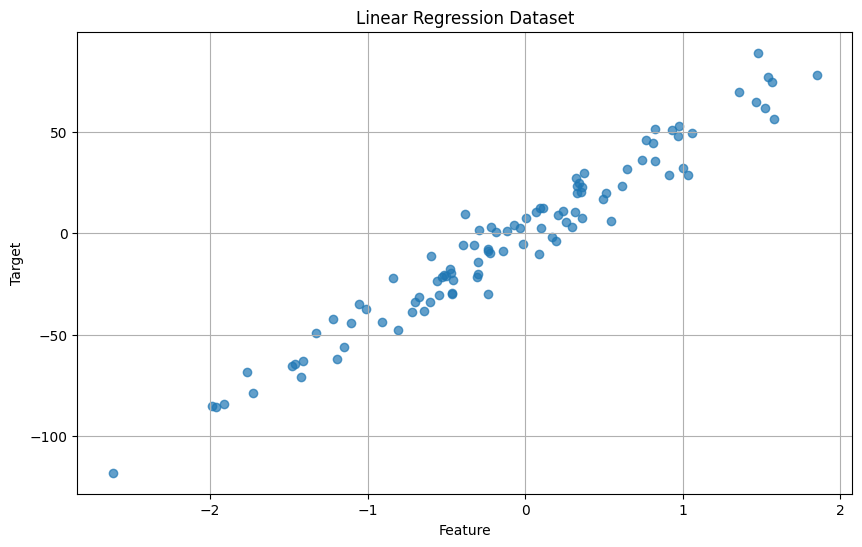

Data shape: X(100, 1), y(100,)
X range: [-2.62, 1.85]
y range: [-118.03, 89.03]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

# Generate sample data
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Visualize data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression Dataset')
plt.grid(True)
plt.show()

print(f"Data shape: X{X.shape}, y{y.shape}")
print(f"X range: [{X.min():.2f}, {X.max():.2f}]")
print(f"y range: [{y.min():.2f}, {y.max():.2f}]")

##2. Implementasi Normal Equation

Normal Equation Results:
Intercept: 1.1651
Coefficient: 44.4372
Predictions for X=[-2, 0, 2]: [-87.70922466   1.16511532  90.03945531]

Scikit-learn Results:
Intercept: 1.1651
Coefficient: 44.4372
Predictions for X=[-2, 0, 2]: [-87.70922466   1.16511532  90.03945531]


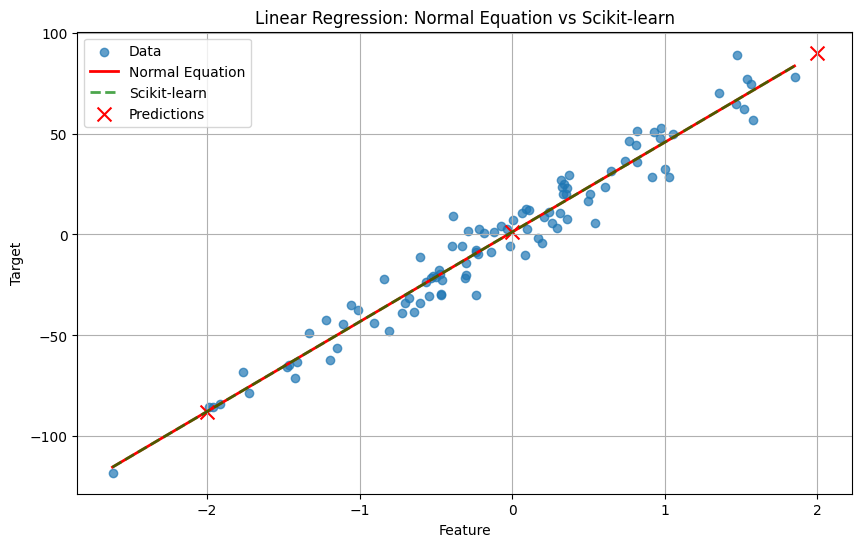

In [2]:
class LinearRegressionNormalEq:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        """Fit using Normal Equation"""
        # Add bias term (intercept)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Normal Equation: theta = (X^T X)^(-1) X^T y
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        """Make predictions"""
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)

    def get_params(self):
        """Get model parameters"""
        return {"intercept": self.theta[0], "coef": self.theta[1:]}

# Train model using Normal Equation
lr_normal = LinearRegressionNormalEq()
lr_normal.fit(X, y)

# Make predictions
X_new = np.array([[-2], [0], [2]])
y_pred = lr_normal.predict(X_new)

print("Normal Equation Results:")
params = lr_normal.get_params()
print(f"Intercept: {params['intercept']:.4f}")
print(f"Coefficient: {params['coef'][0]:.4f}")
print(f"Predictions for X=[-2, 0, 2]: {y_pred}")

# Compare with sklearn
sklearn_lr = LinearRegression()
sklearn_lr.fit(X, y)
sklearn_pred = sklearn_lr.predict(X_new)

print("\nScikit-learn Results:")
print(f"Intercept: {sklearn_lr.intercept_:.4f}")
print(f"Coefficient: {sklearn_lr.coef_[0]:.4f}")
print(f"Predictions for X=[-2, 0, 2]: {sklearn_pred}")

# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label='Data')
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_plot_normal = lr_normal.predict(X_plot)
y_plot_sklearn = sklearn_lr.predict(X_plot)

plt.plot(X_plot, y_plot_normal, 'r-', label='Normal Equation', linewidth=2)
plt.plot(X_plot, y_plot_sklearn, 'g--', label='Scikit-learn', linewidth=2, alpha=0.7)
plt.scatter(X_new, y_pred, color='red', s=100, marker='x', label='Predictions')
plt.legend()
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression: Normal Equation vs Scikit-learn')
plt.grid(True)
plt.show()

##3. Implementasi Gradient Descent

Learning Rate 0.001: Intercept=-0.9451, Coef=24.8270
Learning Rate 0.01: Intercept=1.1589, Coef=44.4227
Learning Rate 0.1: Intercept=1.1651, Coef=44.4372
Learning Rate 0.3: Intercept=1.1651, Coef=44.4372


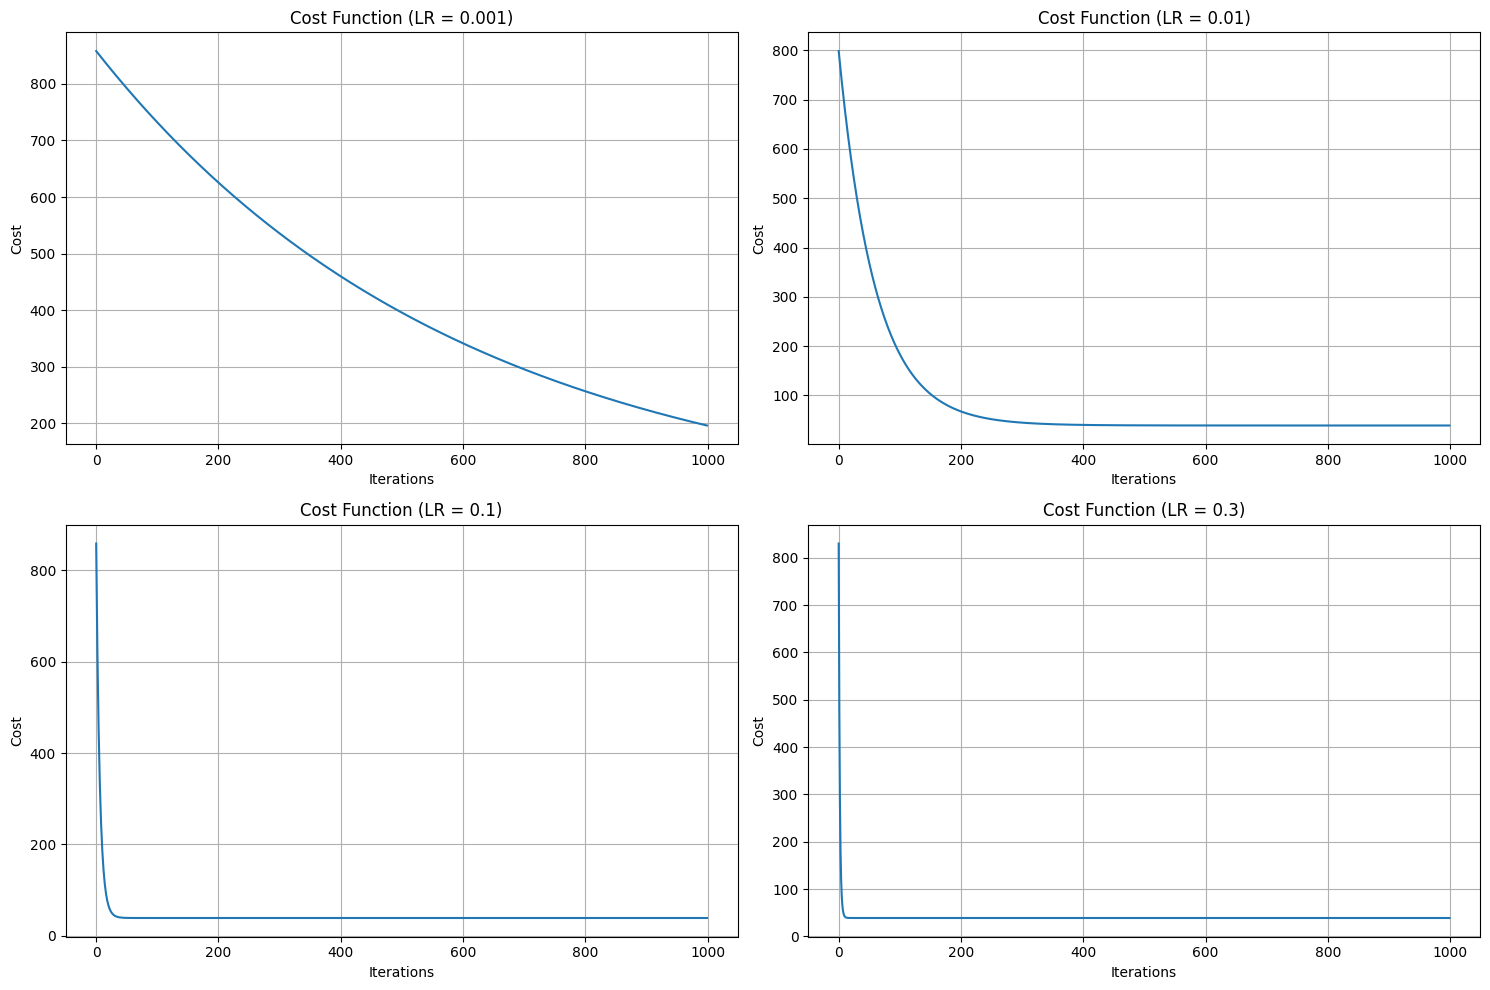

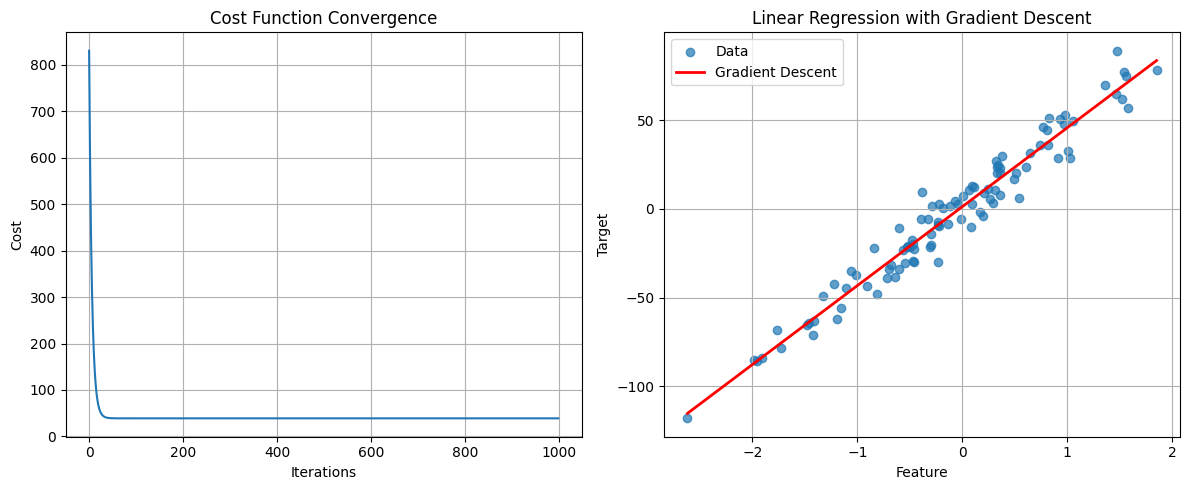

In [3]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.cost_history = []
        self.theta = None

    def fit(self, X, y):
        """Fit using Gradient Descent"""
        # Add bias term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Initialize parameters
        self.theta = np.random.randn(X_b.shape[1], 1)

        m = X_b.shape[0]

        for iteration in range(self.n_iterations):
            # Compute predictions
            y_pred = X_b.dot(self.theta)

            # Compute cost (MSE)
            cost = (1/(2*m)) * np.sum((y_pred - y.reshape(-1, 1))**2)
            self.cost_history.append(cost)

            # Compute gradients
            gradients = (1/m) * X_b.T.dot(y_pred - y.reshape(-1, 1))

            # Update parameters
            self.theta = self.theta - self.learning_rate * gradients

    def predict(self, X):
        """Make predictions"""
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta).flatten()

    def get_params(self):
        """Get model parameters"""
        return {"intercept": self.theta[0, 0], "coef": self.theta[1:].flatten()}

# Test different learning rates
learning_rates = [0.001, 0.01, 0.1, 0.3]
plt.figure(figsize=(15, 10))

for i, lr in enumerate(learning_rates):
    lr_gd = LinearRegressionGD(learning_rate=lr, n_iterations=1000)
    lr_gd.fit(X, y)

    plt.subplot(2, 2, i+1)
    plt.plot(lr_gd.cost_history)
    plt.title(f'Cost Function (LR = {lr})')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.grid(True)

    # Print final parameters
    params = lr_gd.get_params()
    print(f"Learning Rate {lr}: Intercept={params['intercept']:.4f}, Coef={params['coef'][0]:.4f}")

plt.tight_layout()
plt.show()

# Compare convergence
lr_gd_best = LinearRegressionGD(learning_rate=0.1, n_iterations=1000)
lr_gd_best.fit(X, y)

# Visualize final result
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(lr_gd_best.cost_history)
plt.title('Cost Function Convergence')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X, y, alpha=0.7, label='Data')
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_plot = lr_gd_best.predict(X_plot)
plt.plot(X_plot, y_plot, 'r-', label='Gradient Descent', linewidth=2)
plt.legend()
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression with Gradient Descent')
plt.grid(True)

plt.tight_layout()
plt.show()

##4. Stochastic dan Mini-batch Gradient Descent

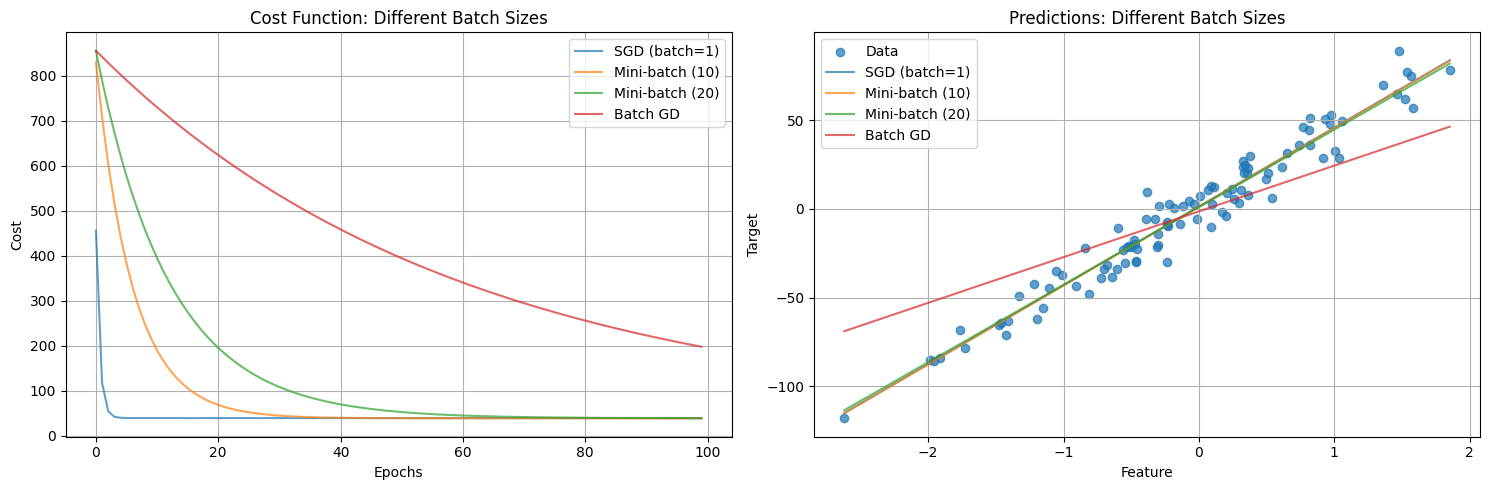

In [4]:
class SGDRegressor:
    def __init__(self, learning_rate=0.01, n_epochs=50, batch_size=1):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.batch_size = batch_size
        self.cost_history = []
        self.theta = None

    def fit(self, X, y):
        """Fit using Stochastic or Mini-batch Gradient Descent"""
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        self.theta = np.random.randn(X_b.shape[1], 1)

        m = X_b.shape[0]

        for epoch in range(self.n_epochs):
            # Shuffle data
            shuffled_indices = np.random.permutation(m)
            X_b_shuffled = X_b[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            epoch_cost = 0

            # Process mini-batches
            for i in range(0, m, self.batch_size):
                end_idx = min(i + self.batch_size, m)
                X_batch = X_b_shuffled[i:end_idx]
                y_batch = y_shuffled[i:end_idx]

                # Compute predictions
                y_pred = X_batch.dot(self.theta)

                # Compute cost
                batch_cost = (1/(2*len(X_batch))) * np.sum((y_pred - y_batch.reshape(-1, 1))**2)
                epoch_cost += batch_cost

                # Compute gradients
                gradients = (1/len(X_batch)) * X_batch.T.dot(y_pred - y_batch.reshape(-1, 1))

                # Update parameters
                self.theta = self.theta - self.learning_rate * gradients

            self.cost_history.append(epoch_cost / (m // self.batch_size))

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta).flatten()

# Compare different batch sizes
batch_sizes = [1, 10, 20, len(X)]  # SGD, Mini-batch, Mini-batch, Batch GD
labels = ['SGD (batch=1)', 'Mini-batch (10)', 'Mini-batch (20)', 'Batch GD']

plt.figure(figsize=(15, 5))

for i, (batch_size, label) in enumerate(zip(batch_sizes, labels)):
    sgd = SGDRegressor(learning_rate=0.01, n_epochs=100, batch_size=batch_size)
    sgd.fit(X, y)

    plt.subplot(1, 2, 1)
    plt.plot(sgd.cost_history, label=label, alpha=0.7)

plt.subplot(1, 2, 1)
plt.title('Cost Function: Different Batch Sizes')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)

# Show final predictions
plt.subplot(1, 2, 2)
plt.scatter(X, y, alpha=0.7, label='Data')
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

for batch_size, label in zip(batch_sizes, labels):
    sgd = SGDRegressor(learning_rate=0.01, n_epochs=100, batch_size=batch_size)
    sgd.fit(X, y)
    y_plot = sgd.predict(X_plot)
    plt.plot(X_plot, y_plot, label=label, alpha=0.7)

plt.legend()
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Predictions: Different Batch Sizes')
plt.grid(True)

plt.tight_layout()
plt.show()

##5. Polynomial Regression

ValueError: x and y must be the same size

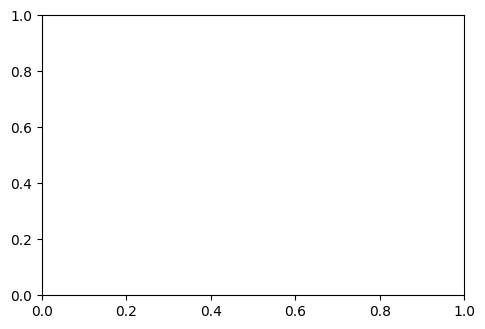

In [5]:
# Generate non-linear data
np.random.seed(42)
m = 100
X_poly = 6 * np.random.rand(m, 1) - 3
y_poly = 0.5 * X_poly**2 + X_poly + 2 + np.random.randn(m, 1).flatten()

plt.figure(figsize=(12, 8))

# Plot original data
plt.subplot(2, 2, 1)
plt.scatter(X_poly, y_poly, alpha=0.7)
plt.title('Non-linear Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)

# Linear regression (will underfit)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_poly)
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
y_plot_lin = lin_reg.predict(X_plot)

plt.subplot(2, 2, 2)
plt.scatter(X_poly, y_poly, alpha=0.7)
plt.plot(X_plot, y_plot_lin, 'r-', linewidth=2, label='Linear')
plt.title('Linear Regression (Underfitting)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Polynomial regression degree 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_2 = poly_features.fit_transform(X_poly)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_2, y_poly)

X_plot_poly = poly_features.transform(X_plot)
y_plot_poly = poly_reg.predict(X_plot_poly)

plt.subplot(2, 2, 3)
plt.scatter(X_poly, y_poly, alpha=0.7)
plt.plot(X_plot, y_plot_poly, 'g-', linewidth=2, label='Polynomial degree 2')
plt.title('Polynomial Regression (Good Fit)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Polynomial regression degree 10 (overfitting)
poly_features_10 = PolynomialFeatures(degree=10, include_bias=False)
X_poly_10 = poly_features_10.fit_transform(X_poly)
poly_reg_10 = LinearRegression()
poly_reg_10.fit(X_poly_10, y_poly)

X_plot_poly_10 = poly_features_10.transform(X_plot)
y_plot_poly_10 = poly_reg_10.predict(X_plot_poly_10)

plt.subplot(2, 2, 4)
plt.scatter(X_poly, y_poly, alpha=0.7)
plt.plot(X_plot, y_plot_poly_10, 'purple', linewidth=2, label='Polynomial degree 10')
plt.title('High Degree Polynomial (Overfitting)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print coefficients
print("Linear Regression Coefficients:")
print(f"Intercept: {lin_reg.intercept_:.4f}")
print(f"Coefficient: {lin_reg.coef_[0]:.4f}")

print("\nPolynomial Regression (degree 2) Coefficients:")
print(f"Intercept: {poly_reg.intercept_:.4f}")
print(f"Coefficients: {poly_reg.coef_}")

print("\nPolynomial Features (degree 2):")
print(f"Original features: {X_poly.shape[1]}")
print(f"Polynomial features: {X_poly_2.shape[1]}")
print(f"Feature names: {poly_features.get_feature_names_out()}")

##6. Learning Curves


Learning Curves for Linear Regression


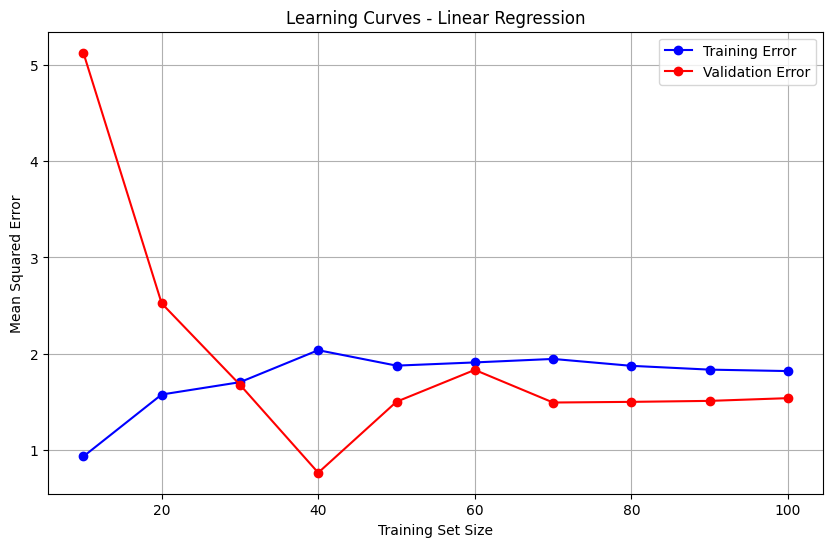

Final Training Error: 1.8215
Final Validation Error: 1.5405
Gap: 0.2810

Learning Curves for Polynomial Degree 2


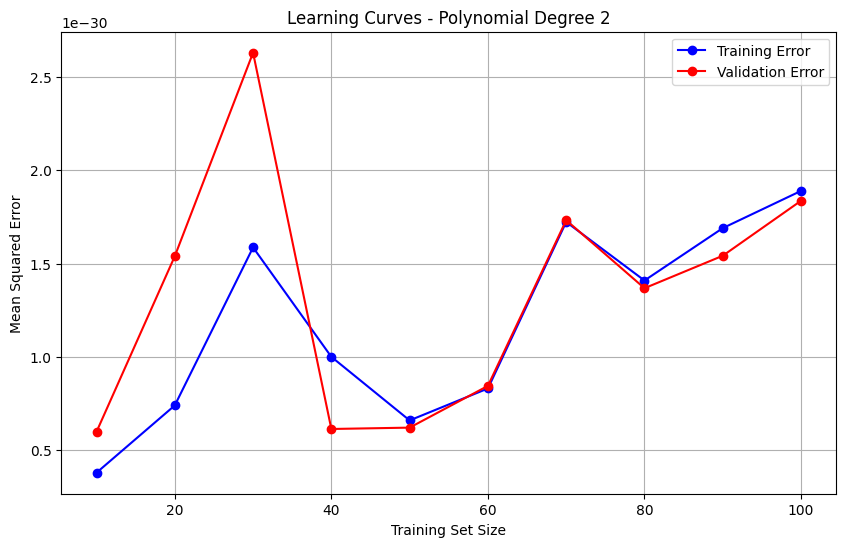

Final Training Error: 0.0000
Final Validation Error: 0.0000
Gap: 0.0000

Learning Curves for Polynomial Degree 10


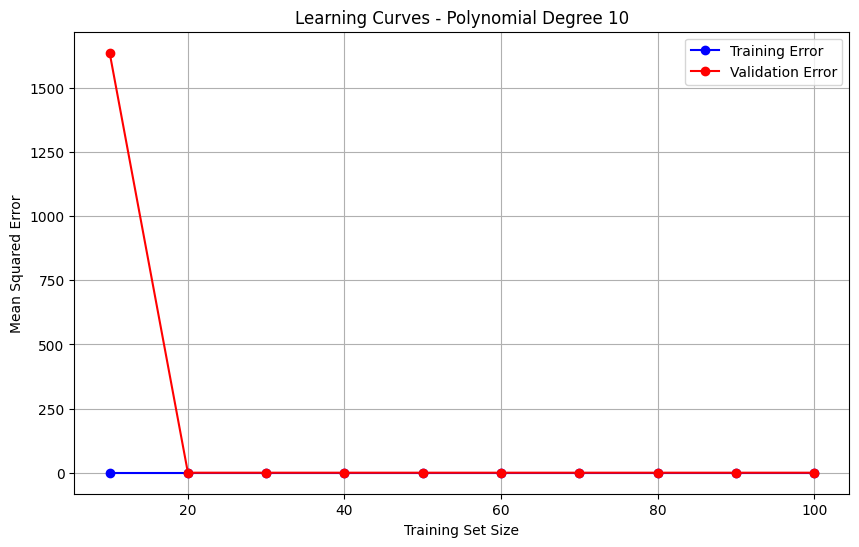

Final Training Error: 0.0000
Final Validation Error: 0.0000
Gap: 0.0000


In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import validation_curve

def plot_learning_curves(model, X, y, title="Learning Curves"):
    """Plot learning curves for a model"""
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_errors = []
    val_errors = []

    for train_size in train_sizes:
        # Get subset of training data
        subset_size = int(train_size * len(X))
        X_subset = X[:subset_size]
        y_subset = y[:subset_size]

        # Split into train and validation
        X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(
            X_subset, y_subset, test_size=0.2, random_state=42
        )

        # Train model
        model.fit(X_train_sub, y_train_sub)

        # Compute errors
        train_pred = model.predict(X_train_sub)
        val_pred = model.predict(X_val_sub)

        train_error = mean_squared_error(y_train_sub, train_pred)
        val_error = mean_squared_error(y_val_sub, val_pred)

        train_errors.append(train_error)
        val_errors.append(val_error)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes * len(X), train_errors, 'o-', label='Training Error', color='blue')
    plt.plot(train_sizes * len(X), val_errors, 'o-', label='Validation Error', color='red')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

    return train_errors, val_errors

# Compare learning curves for different models
models = [
    (LinearRegression(), "Linear Regression"),
    (Pipeline([('poly', PolynomialFeatures(degree=2)), ('reg', LinearRegression())]), "Polynomial Degree 2"),
    (Pipeline([('poly', PolynomialFeatures(degree=10)), ('reg', LinearRegression())]), "Polynomial Degree 10")
]

for model, name in models:
    print(f"\nLearning Curves for {name}")
    train_errors, val_errors = plot_learning_curves(model, X_poly, y_poly, f"Learning Curves - {name}")
    print(f"Final Training Error: {train_errors[-1]:.4f}")
    print(f"Final Validation Error: {val_errors[-1]:.4f}")
    print(f"Gap: {abs(val_errors[-1] - train_errors[-1]):.4f}")

##7. Regularized Linear Models

Dataset shape: (100, 15)
Relevant features: 10
Noise features: 5


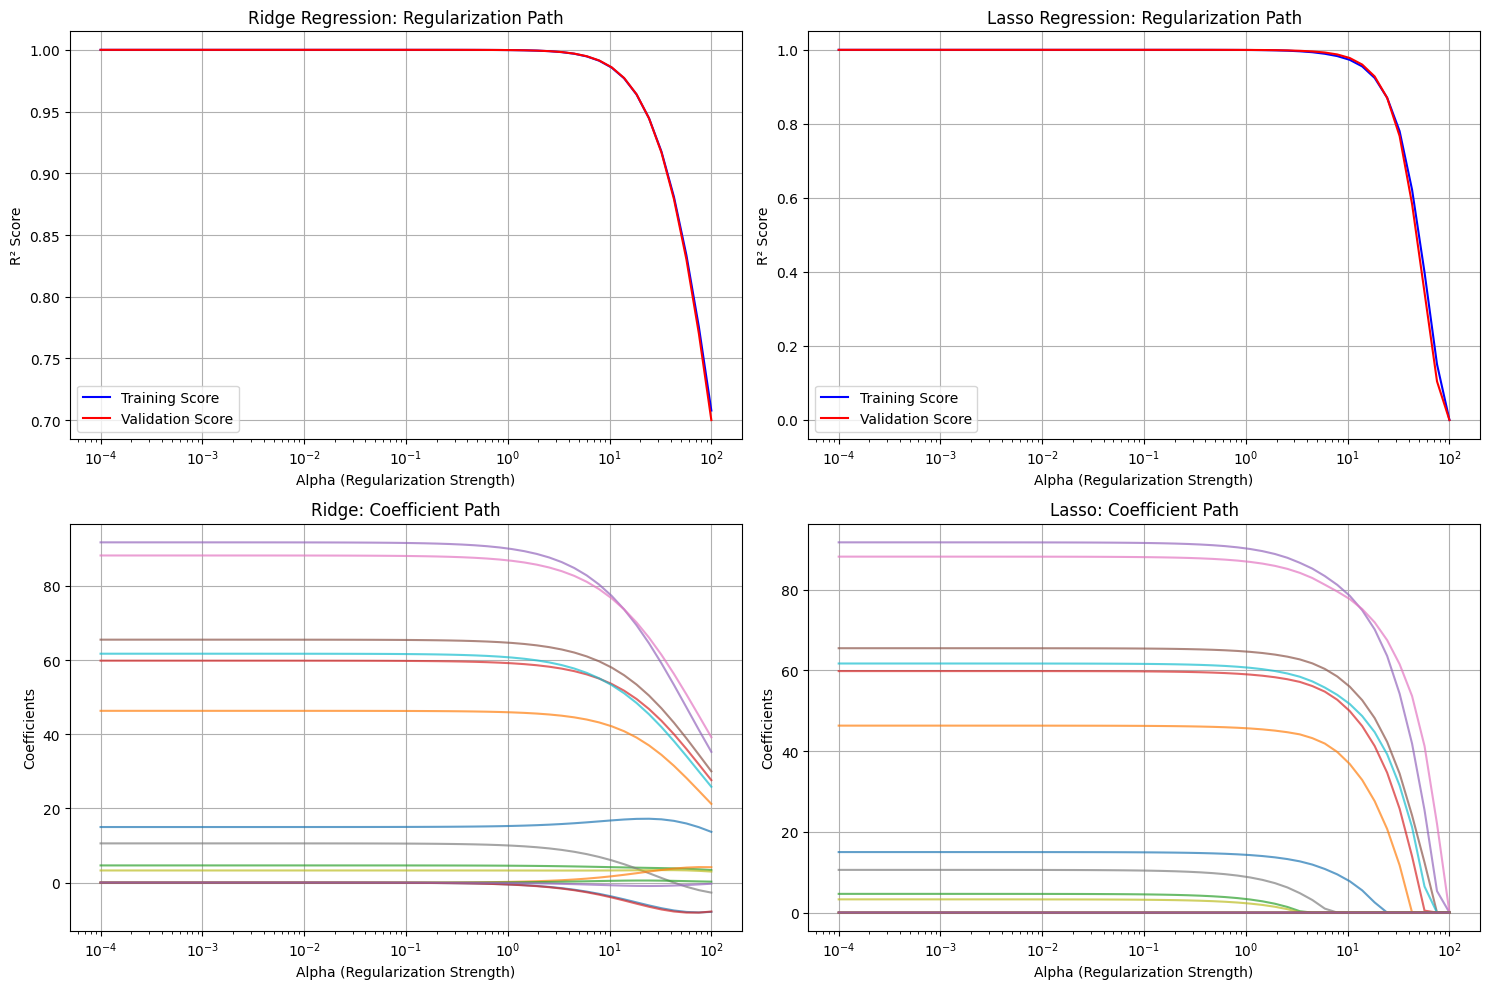

Best Ridge Alpha: 0.0001
Best Ridge Test Score: 1.0000
Best Lasso Alpha: 0.0001
Best Lasso Test Score: 1.0000

Model Comparison:
Linear Regression | Train R²: 1.0000 | Test R²: 1.0000 | Non-zero coefs: 15
Ridge           | Train R²: 1.0000 | Test R²: 1.0000 | Non-zero coefs: 15
Lasso           | Train R²: 1.0000 | Test R²: 1.0000 | Non-zero coefs: 15
Elastic Net     | Train R²: 0.9974 | Test R²: 0.9975 | Non-zero coefs: 15


In [7]:
# Generate dataset with more features for regularization demo
np.random.seed(42)
X_reg, y_reg = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Add some irrelevant features (noise)
X_noise = np.random.randn(100, 5)
X_reg_with_noise = np.c_[X_reg, X_noise]

print(f"Dataset shape: {X_reg_with_noise.shape}")
print(f"Relevant features: {X_reg.shape[1]}")
print(f"Noise features: {X_noise.shape[1]}")

# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_with_noise, y_reg, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reg)
X_test_scaled = scaler.transform(X_test_reg)

# Test different regularization strengths
alphas = np.logspace(-4, 2, 50)  # From 0.0001 to 100

# Ridge Regression
ridge_train_scores = []
ridge_test_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train_reg)

    train_score = ridge.score(X_train_scaled, y_train_reg)
    test_score = ridge.score(X_test_scaled, y_test_reg)

    ridge_train_scores.append(train_score)
    ridge_test_scores.append(test_score)

# Lasso Regression
lasso_train_scores = []
lasso_test_scores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=2000)
    lasso.fit(X_train_scaled, y_train_reg)

    train_score = lasso.score(X_train_scaled, y_train_reg)
    test_score = lasso.score(X_test_scaled, y_test_reg)

    lasso_train_scores.append(train_score)
    lasso_test_scores.append(test_score)

# Plot regularization paths
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.semilogx(alphas, ridge_train_scores, 'b-', label='Training Score')
plt.semilogx(alphas, ridge_test_scores, 'r-', label='Validation Score')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R² Score')
plt.title('Ridge Regression: Regularization Path')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.semilogx(alphas, lasso_train_scores, 'b-', label='Training Score')
plt.semilogx(alphas, lasso_test_scores, 'r-', label='Validation Score')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R² Score')
plt.title('Lasso Regression: Regularization Path')
plt.legend()
plt.grid(True)

# Plot coefficients path for Ridge
plt.subplot(2, 2, 3)
ridge_coefs = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train_reg)
    ridge_coefs.append(ridge.coef_)

ridge_coefs = np.array(ridge_coefs)
for i in range(ridge_coefs.shape[1]):
    plt.semilogx(alphas, ridge_coefs[:, i], alpha=0.7)
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Coefficients')
plt.title('Ridge: Coefficient Path')
plt.grid(True)

# Plot coefficients path for Lasso
plt.subplot(2, 2, 4)
lasso_coefs = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=2000)
    lasso.fit(X_train_scaled, y_train_reg)
    lasso_coefs.append(lasso.coef_)

lasso_coefs = np.array(lasso_coefs)
for i in range(lasso_coefs.shape[1]):
    plt.semilogx(alphas, lasso_coefs[:, i], alpha=0.7)
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Coefficients')
plt.title('Lasso: Coefficient Path')
plt.grid(True)

plt.tight_layout()
plt.show()

# Find optimal alpha for both models
best_ridge_idx = np.argmax(ridge_test_scores)
best_lasso_idx = np.argmax(lasso_test_scores)

print(f"Best Ridge Alpha: {alphas[best_ridge_idx]:.4f}")
print(f"Best Ridge Test Score: {ridge_test_scores[best_ridge_idx]:.4f}")
print(f"Best Lasso Alpha: {alphas[best_lasso_idx]:.4f}")
print(f"Best Lasso Test Score: {lasso_test_scores[best_lasso_idx]:.4f}")

# Compare final models
models_comparison = [
    ("Linear Regression", LinearRegression()),
    ("Ridge", Ridge(alpha=alphas[best_ridge_idx])),
    ("Lasso", Lasso(alpha=alphas[best_lasso_idx], max_iter=2000)),
    ("Elastic Net", ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=2000))
]

print("\nModel Comparison:")
print("=" * 60)
for name, model in models_comparison:
    model.fit(X_train_scaled, y_train_reg)
    train_score = model.score(X_train_scaled, y_train_reg)
    test_score = model.score(X_test_scaled, y_test_reg)

    # Count non-zero coefficients
    non_zero_coefs = np.sum(np.abs(model.coef_) > 1e-5)

    print(f"{name:15} | Train R²: {train_score:.4f} | Test R²: {test_score:.4f} | Non-zero coefs: {non_zero_coefs}")

##8. Logistic Regression Implementation

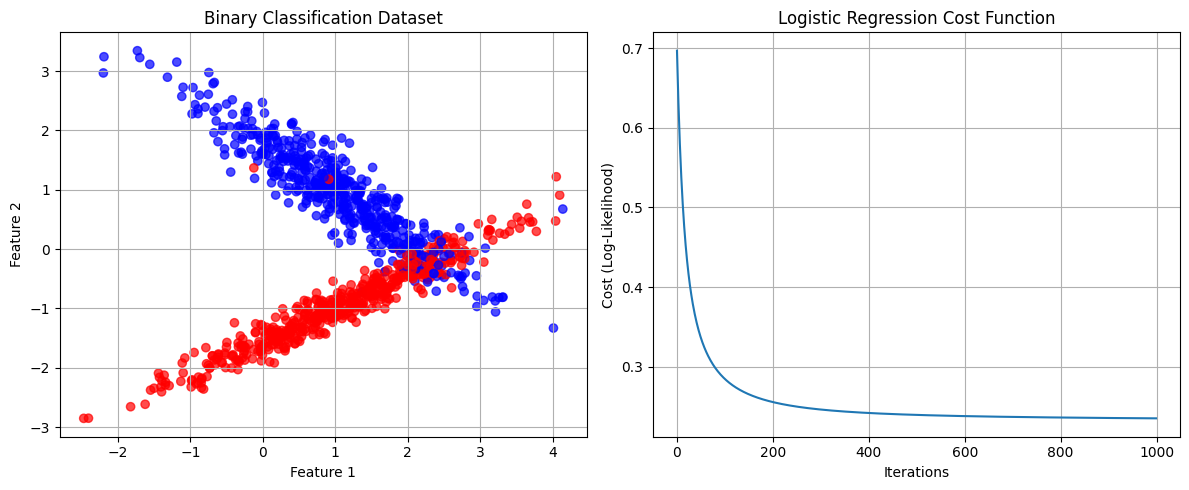

Logistic Regression Comparison:
Custom Implementation Accuracy: 0.9000
Scikit-learn Accuracy: 0.9000
Probability Correlation: 0.9993


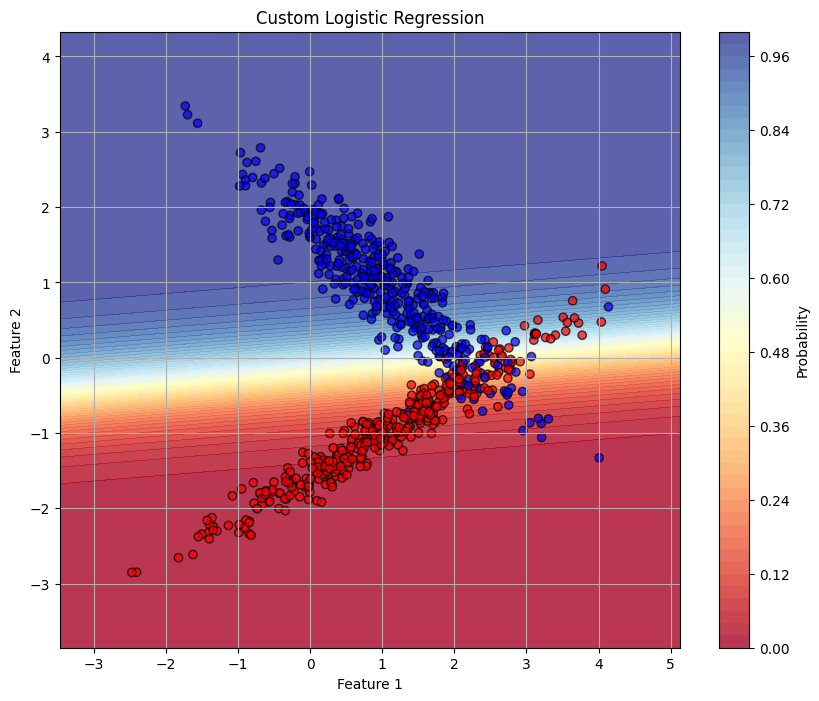

ValueError: cannot reshape array of size 353420 into shape (410,431)

<Figure size 1000x800 with 0 Axes>

In [8]:
# Generate binary classification dataset
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generate dataset
X_log, y_log = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                                   n_informative=2, n_clusters_per_class=1,
                                   random_state=42)

# Split data
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, y_log, test_size=0.2, random_state=42
)

# Visualize data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
colors = ['red' if label == 0 else 'blue' for label in y_log]
plt.scatter(X_log[:, 0], X_log[:, 1], c=colors, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Dataset')
plt.grid(True)

# Implement Logistic Regression from scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.cost_history = []
        self.theta = None

    def sigmoid(self, z):
        """Sigmoid activation function"""
        # Clip z to prevent overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """Fit logistic regression model"""
        # Add bias term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Initialize parameters
        self.theta = np.random.randn(X_b.shape[1], 1) * 0.01

        m = X_b.shape[0]

        for i in range(self.n_iterations):
            # Forward propagation
            z = X_b.dot(self.theta)
            h = self.sigmoid(z)

            # Compute cost (log-likelihood)
            cost = -(1/m) * np.sum(y.reshape(-1, 1) * np.log(h + 1e-8) +
                                   (1 - y.reshape(-1, 1)) * np.log(1 - h + 1e-8))
            self.cost_history.append(cost)

            # Compute gradients
            gradients = (1/m) * X_b.T.dot(h - y.reshape(-1, 1))

            # Update parameters
            self.theta = self.theta - self.learning_rate * gradients

    def predict_proba(self, X):
        """Predict class probabilities"""
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return self.sigmoid(X_b.dot(self.theta)).flatten()

    def predict(self, X):
        """Make binary predictions"""
        return (self.predict_proba(X) >= 0.5).astype(int)

# Train custom logistic regression
log_reg_custom = LogisticRegressionScratch(learning_rate=0.1, n_iterations=1000)
log_reg_custom.fit(X_train_log, y_train_log)

# Train sklearn logistic regression
log_reg_sklearn = LogisticRegression()
log_reg_sklearn.fit(X_train_log, y_train_log)

# Plot cost function
plt.subplot(1, 2, 2)
plt.plot(log_reg_custom.cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (Log-Likelihood)')
plt.title('Logistic Regression Cost Function')
plt.grid(True)

plt.tight_layout()
plt.show()

# Compare predictions
custom_pred = log_reg_custom.predict(X_test_log)
sklearn_pred = log_reg_sklearn.predict(X_test_log)

custom_proba = log_reg_custom.predict_proba(X_test_log)
sklearn_proba = log_reg_sklearn.predict_proba(X_test_log)[:, 1]

print("Logistic Regression Comparison:")
print(f"Custom Implementation Accuracy: {np.mean(custom_pred == y_test_log):.4f}")
print(f"Scikit-learn Accuracy: {np.mean(sklearn_pred == y_test_log):.4f}")
print(f"Probability Correlation: {np.corrcoef(custom_proba, sklearn_proba)[0, 1]:.4f}")

# Visualize decision boundary
def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    """Plot decision boundary for 2D classification"""
    plt.figure(figsize=(10, 8))

    # Create mesh
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Make predictions on mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    if hasattr(model, 'predict_proba'):
        if hasattr(model, 'predict_proba'):
            Z = model.predict_proba(mesh_points)
        else:
            Z = model.predict_proba(mesh_points)
    else:
        Z = model.predict_proba(mesh_points)[:, 1]

    Z = Z.reshape(xx.shape)

    # Plot contour and training examples
    plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.colorbar(label='Probability')

    colors = ['red' if label == 0 else 'blue' for label in y]
    plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.7, edgecolors='black')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Plot decision boundaries
plot_decision_boundary(X_train_log, y_train_log, log_reg_custom, "Custom Logistic Regression")
plot_decision_boundary(X_train_log, y_train_log, log_reg_sklearn, "Scikit-learn Logistic Regression")

##9. Softmax Regression (Multiclass)

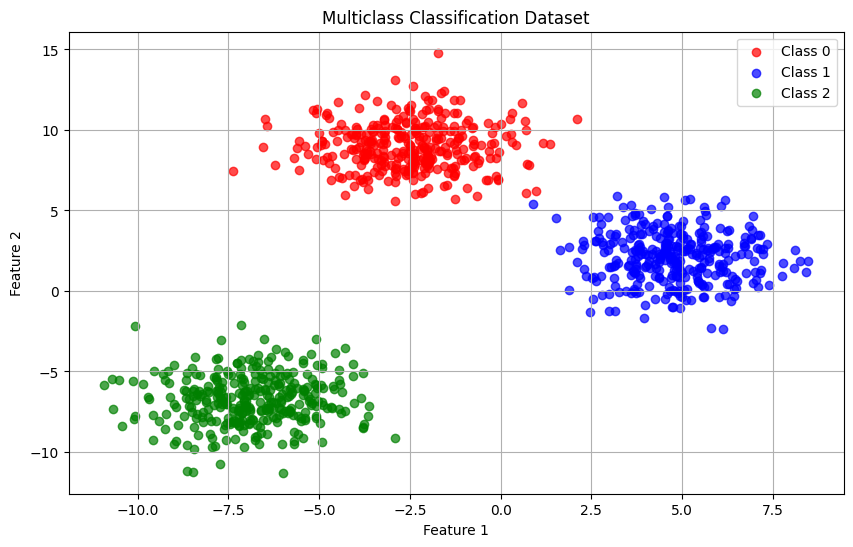

Multiclass Classification Results:
Custom Softmax Accuracy: 1.0000
Scikit-learn Accuracy: 1.0000


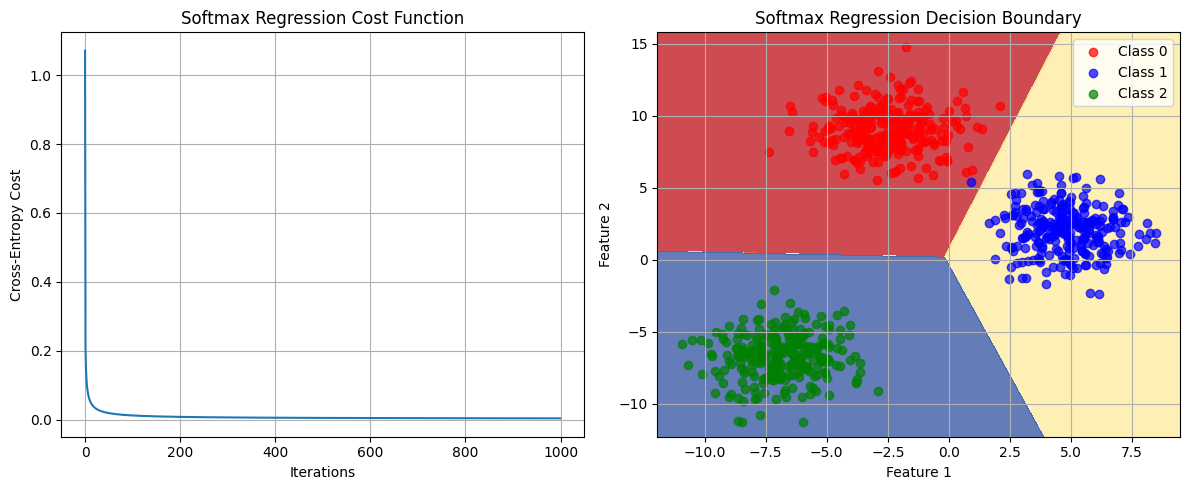

In [9]:
# Generate multiclass dataset
from sklearn.datasets import make_blobs

X_multi, y_multi = make_blobs(n_samples=1000, centers=3, n_features=2,
                              random_state=42, cluster_std=1.5)

# Visualize multiclass data
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']
for i in range(3):
    plt.scatter(X_multi[y_multi == i, 0], X_multi[y_multi == i, 1],
                c=colors[i], alpha=0.7, label=f'Class {i}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Multiclass Classification Dataset')
plt.legend()
plt.grid(True)
plt.show()

# Implement Softmax Regression
class SoftmaxRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.cost_history = []
        self.theta = None
        self.n_classes = None

    def softmax(self, z):
        """Softmax activation function"""
        # Subtract max for numerical stability
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def one_hot_encode(self, y):
        """Convert labels to one-hot encoding"""
        n_classes = len(np.unique(y))
        one_hot = np.zeros((len(y), n_classes))
        one_hot[np.arange(len(y)), y] = 1
        return one_hot

    def fit(self, X, y):
        """Fit softmax regression model"""
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias
        self.n_classes = len(np.unique(y))

        # Initialize parameters
        self.theta = np.random.randn(X_b.shape[1], self.n_classes) * 0.01

        # One-hot encode labels
        y_one_hot = self.one_hot_encode(y)
        m = X_b.shape[0]

        for i in range(self.n_iterations):
            # Forward propagation
            scores = X_b.dot(self.theta)
            probabilities = self.softmax(scores)

            # Compute cost (cross-entropy)
            cost = -(1/m) * np.sum(y_one_hot * np.log(probabilities + 1e-8))
            self.cost_history.append(cost)

            # Compute gradients
            gradients = (1/m) * X_b.T.dot(probabilities - y_one_hot)

            # Update parameters
            self.theta = self.theta - self.learning_rate * gradients

    def predict_proba(self, X):
        """Predict class probabilities"""
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        scores = X_b.dot(self.theta)
        return self.softmax(scores)

    def predict(self, X):
        """Make predictions"""
        probabilities = self.predict_proba(X)
        return np.argmax(probabilities, axis=1)

# Split data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

# Train custom softmax regression
softmax_reg = SoftmaxRegression(learning_rate=0.1, n_iterations=1000)
softmax_reg.fit(X_train_multi, y_train_multi)

# Compare with sklearn
log_reg_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_multi.fit(X_train_multi, y_train_multi)

# Evaluate models
custom_pred_multi = softmax_reg.predict(X_test_multi)
sklearn_pred_multi = log_reg_multi.predict(X_test_multi)

print("Multiclass Classification Results:")
print(f"Custom Softmax Accuracy: {np.mean(custom_pred_multi == y_test_multi):.4f}")
print(f"Scikit-learn Accuracy: {np.mean(sklearn_pred_multi == y_test_multi):.4f}")

# Plot cost function
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(softmax_reg.cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cross-Entropy Cost')
plt.title('Softmax Regression Cost Function')
plt.grid(True)

# Plot decision boundaries for multiclass
plt.subplot(1, 2, 2)
h = 0.02
x_min, x_max = X_multi[:, 0].min() - 1, X_multi[:, 0].max() + 1
y_min, y_max = X_multi[:, 1].min() - 1, X_multi[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = softmax_reg.predict(mesh_points)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
colors = ['red', 'blue', 'green']
for i in range(3):
    plt.scatter(X_train_multi[y_train_multi == i, 0],
                X_train_multi[y_train_multi == i, 1],
                c=colors[i], alpha=0.7, label=f'Class {i}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Softmax Regression Decision Boundary')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()